In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data=pd.read_csv("/Users/albusdumbledore/Desktop/Gasprice.txt", header=None)


In [3]:
data.head()
X1 = data.iloc[:, 0:3]
print(X1)

     0  1     2
0   89  4  3.84
1   66  1  3.19
2   78  3  3.78
3  111  6  3.89
4   44  1  3.57
5   77  3  3.57
6   80  3  3.03
7   66  2  3.51
8  109  5  3.54
9   76  3  3.25


In [4]:
data.describe()

,0,1,2,3
count,10.000000,10.000000,10.00000,10.000000
mean,79.600000,3.100000,3.51700,6.390000
std,19.995555,1.595131,0.28562,0.867243
min,44.000000,1.000000,3.03000,4.800000
25%,68.500000,2.250000,3.31500,5.800000
50%,77.500000,3.000000,3.55500,6.500000
75%,86.750000,3.750000,3.72750,7.000000
max,111.000000,6.000000,3.89000,7.400000


Text(0, 0.5, 'trvaelTimeinHr (Y)')

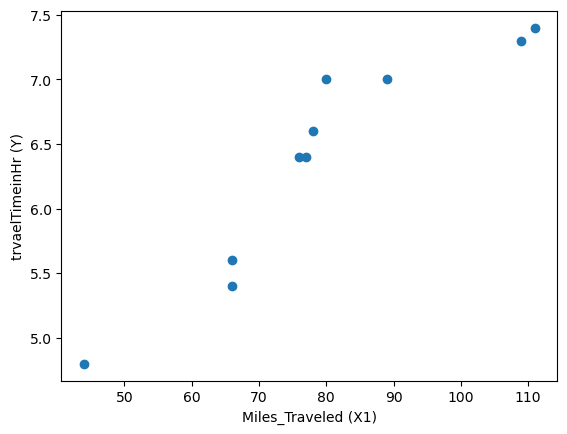

In [5]:
plt.scatter(data[0],data[3])
plt.xlabel("Miles_Traveled (X1)")
plt.ylabel("trvaelTimeinHr (Y)")


Text(0, 0.5, 'trvaelTimeinHr (Y)')

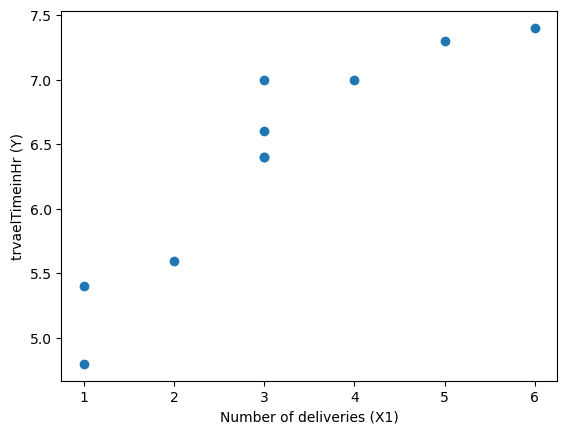

In [6]:
plt.scatter(data[1],data[3])
plt.xlabel("Number of deliveries (X1)")
plt.ylabel("trvaelTimeinHr (Y)")

Text(0, 0.5, 'trvael Time in Hr (Y)')

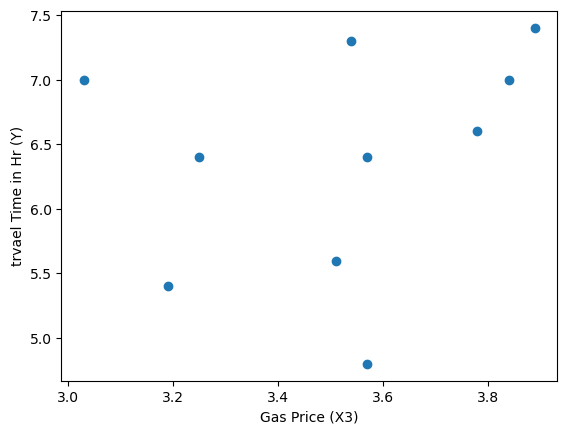

In [7]:
plt.scatter(data[2],data[3])
plt.xlabel("Gas Price (X3)")
plt.ylabel("trvael Time in Hr (Y)")

In [8]:
def computeCost(X,y,theta):
    """
    Take in a numpy array X,y, theta and generate the cost function of using theta as parameter
    in a linear regression model
    """
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions - y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [9]:
data_n = data.values
m=len(data_n[:,-1])
X = data_n[:,0:3].reshape(m,3)
X=np.append(np.ones((m,1)), X, axis=1)

y=data_n[:,3].reshape(m,1)

theta=np.zeros((4,1))

computeCost(X,y,theta)
#print(data_n)
#print(theta)
#Y= X.transpose()
print("Dimension of X: ", np.shape(X))
print("Dimension of Theta: ", np.shape(theta))
print("Dimension of Y: ",np.shape(y))
#print(X)
#print(y)


Dimension of X:  (10, 4)
Dimension of Theta:  (4, 1)
Dimension of Y:  (10, 1)


In [10]:
def gradientDescent(X,y,theta,alpha,num_iters):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    
    return theta and the list of the cost of theta during each iteration
    """
    
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 2/m * error
        theta=theta - descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

In [11]:
#The Multiple linear regression equation
theta, J_history = gradientDescent(X,y,theta,0.0001,400000)
print("h(x) ="+str(round(theta[0,0],5))+" + "+str(round(theta[1,0],5))+"x1 + "+str(round(theta[2,0],5))+"x2 + "+str(round(theta[3,0],5))+"x3")



h(x) =1.09761 + 0.05075x1 + -0.13823x2 + 0.47499x3


[[  1.    89.     4.     3.84]
 [  1.    66.     1.     3.19]
 [  1.    78.     3.     3.78]
 [  1.   111.     6.     3.89]
 [  1.    44.     1.     3.57]
 [  1.    77.     3.     3.57]
 [  1.    80.     3.     3.03]
 [  1.    66.     2.     3.51]
 [  1.   109.     5.     3.54]
 [  1.    76.     3.     3.25]]


<>:4: SyntaxWarning: invalid escape sequence '\T'
<>:4: SyntaxWarning: invalid escape sequence '\T'
/var/folders/7b/_r9yj4yd697gbth0gx3_nm640000gn/T/ipykernel_6638/3859016003.py:4: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel("$J(\Theta)$")


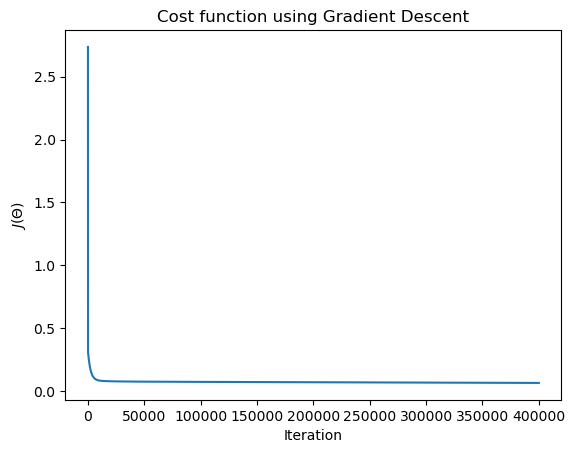

In [12]:
#Visualize the cost function
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
print(X)

In [13]:
#Prediction function
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]

In [14]:
#Make prediction using optmized theta values
print(theta)
new_x = np.array([110,5,3.54])
new_x = np.append(np.ones(1),new_x)
predict1=predict(new_x,theta)
print("For miles traveled 110, num_deliveries 5, gas price 3.54,  the travel time is "+str(round(predict1,0)),"Hours")


[[ 1.09760638]
 [ 0.0507496 ]
 [-0.13823009]
 [ 0.47499116]]
For miles traveled 110, num_deliveries 5, gas price 3.54,  the travel time is 8.0 Hours


In [15]:
Y_pred = []
l = len(X)
for i in range (0,l):
    temp = predict(np.array(X[i]),theta)
    Y_pred.append(temp)
    

In [16]:
print(Y_pred)

[6.885366724730463, 5.8240718721076465, 6.436851713012681, 7.749147366993072, 4.888077252153179, 6.286353966738929, 6.182107548812255, 5.837838955021148, 7.619631343781378, 6.08360719290768]


In [17]:
y_pred = np.array([Y_pred]).T
#print(y, y_pred)
cost = np.sum((y-y_pred)**2)
print("SSE:",cost)


#print(np.shape(y))


#print(np.shape(y_pred))


SSE: 1.2899560457025245


In [18]:
Y_mean = np.mean(y)
print(Y_mean)

6.389999999999999


In [19]:
SST = np.sum((Y_mean - y)**2)

In [20]:
SSR = SST - cost
R_Square = (SSR/SST)*100

In [21]:
print('\nSST= ', SST,'\nSSR= ', SSR, '\nSSE= ', cost, '\nR_Square= ', R_Square)


SST=  6.769000000000001 
SSR=  5.4790439542974765 
SSE=  1.2899560457025245 
R_Square=  80.94318147876312
